### 一.原理

对于上一节的HBOS，我想到一个问题，那就是计算的异常值没有去掉相关性，如果某几个因子高度相关，那么HBOS异常值其实会对这部分重复计算，所以这里想到了利用PCA的思路先对数据去相关性，然后再求直方图概率，介绍如下（图片来源:https://zhuanlan.zhihu.com/p/46626607）  

（1）原始数据：如下的原始点$A$和$B$，虽然它们都是离群点，但$B$点更像是在数据分布的趋势上（服从$y=x$），所以，我们期望$A$的异常值能比$B$更高

![avatar](./source/20_phbos_01.png)

但是在计算HBOS值时，我们是对$x$轴和$y$轴进行等距划分，然后计算直方图概率，所以，这其实会使得$A$和$B$点在$x$轴和$y$轴上的直方图概率分布差异不大（还请自行脑补），为了扩大差异，可以将原始数据转换到主成分坐标轴上来表示。  

（2）PCA后的数据：如下，经过将数据投影到主成分方向上，$A$的异常值会明显高于$B$，因为在$y$轴上做等距切分，$A$点的直方概率远低于$B$点

![avatar](./source/20_phbos_02.png)  

### 二.代码实现
其实就是之前的PCA+HBOS，我这里给它们组合了一个新名：pHBOS，同样地，代码放在ml_models.outlier_detect

In [1]:
import os
os.chdir('../')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification
from ml_models.outlier_detect import pHbos

In [2]:
#造数据
X, _ = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_repeated=0, n_classes=3,
                           n_clusters_per_class=1, weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=42)

In [3]:
#训练
hbos = pHbos(thresh=0.05)
y = hbos.fit_transform(X)

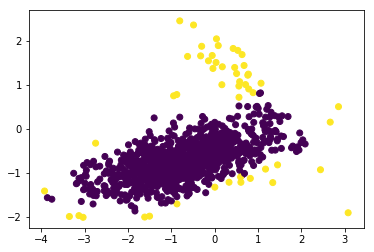

In [4]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.show()

#### 对比一下之前的hbos

In [5]:
from ml_models.outlier_detect import HBOS
hbos = HBOS(thresh=0.05)
y = hbos.fit_transform(X)

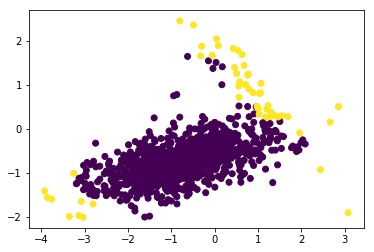

In [6]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.show()